# ScikitLearn LinearRegression

RSS(Residual Sum of Squares) 의 최소화, OLS(Ordinary Least Squares) 추정 방식
* OLS: 주어진 독립 변수(x)와 종속 변수(y) 사이의 선형 관계를 가정하고, 잔차(residual)를 최소화하는 최적의 회귀 계수(coefficient)를 구하는 방법

입력 파라미터
- fit_intercept: 절편 값의 계산
- normalize \[default: False]: True 이면 회귀 수행 전 입력 데이터 세트 정규화
속성
- coef_ : 회귀 계수를 배열 형태로 저장하는 속성.
- intercept_ : intercept 값

## 회귀 평가 지표
MAE: |실제값 - 예측값| 의 평균
MSE: (실제값 - 예측값)^2 의 평균
RMSE: sqrt(MSE)
R^2: 실제값의 분산 대비 예측값의 분산 비율 (1에 가까울수록 좋음)

## 보스턴 주택 가격 회귀 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# data set load
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF["PRICE"] = boston.target
print("Boston Dataset Size: {0}".format(bostonDF.shape))
bostonDF.head()

Boston Dataset Size: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


각 column이 회귀 결과에 미치는 영향의 정도

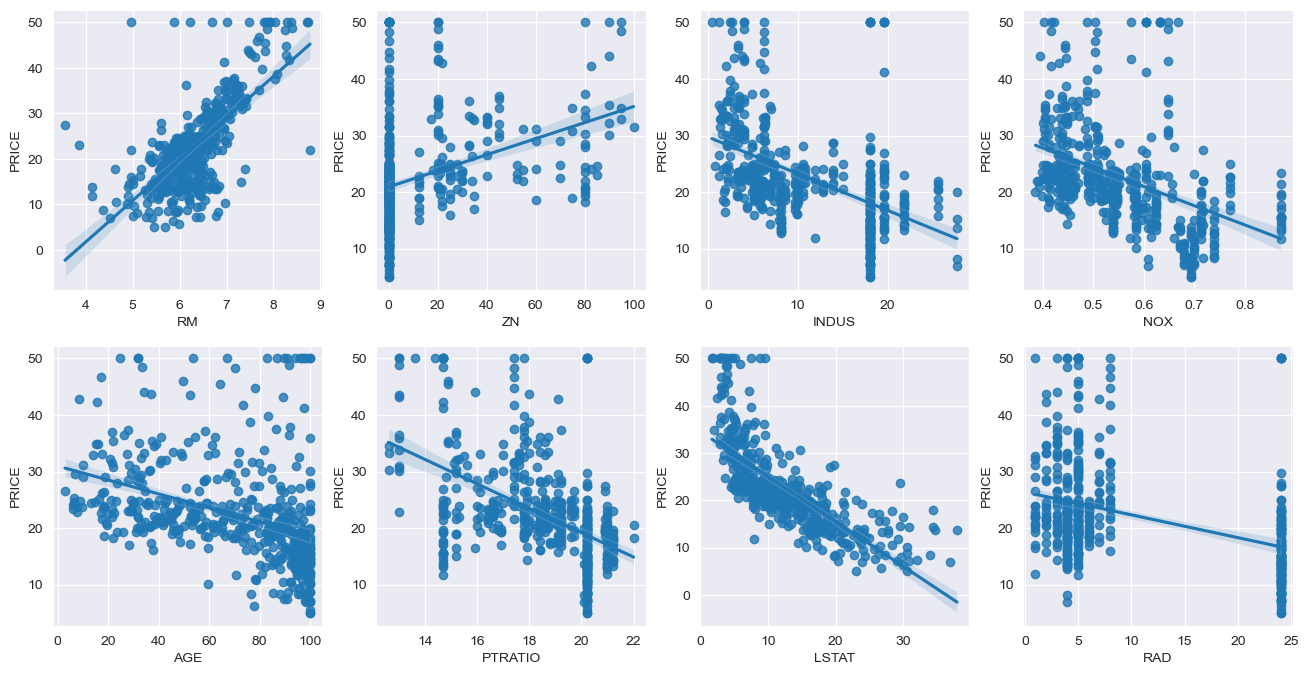

In [2]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_prds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_prds)
rmse = np.sqrt(mse)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("Variance score: {0:.3f}".format(r2_score(y_test, y_prds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [4]:
print("intercept:", lr.intercept_)
print("coef", np.round(lr.coef_, 1))

intercept: 40.9955951721644
coef [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [5]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("Negative MSE scores:", np.round(neg_mse_scores, 2))
print("RMSE scores:", np.round(rmse_scores, 2))
print("average RMSE:", avg_rmse)

Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE scores: [3.53 5.1  5.75 8.99 5.77]
average RMSE: 5.828658946215826
